# KNN Algorithm using numpy and pandas

Bhavishya Sharma           11811256           TY_A_31

## Importing libraries

In [455]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing dataset   

In [456]:
df=pd.read_csv('knn data set.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Function for splitting the dataset according to ratio

In [458]:
def split_dataset(df,ratio):
    train = df.sample(frac=ratio)  # random sample data is generated according to ratio 
    test = df.drop(train.index)    # Dropping the train index from df to get remaining
    return train, test

train_data, test_data = split_dataset(df,0.7)
train_data.head()

,Age,EstimatedSalary,Purchased
342,38,65000,0
254,50,44000,0
185,31,66000,0
292,55,39000,1
371,60,83000,1


In [459]:
test_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
4,19,76000,0
10,26,80000,0
11,26,52000,0
13,32,18000,0


### Further splitting the train and test data into features as X and target as Y 

In [460]:
X_train = train_data.iloc[:, :-1] # Features of train
y_train = train_data.iloc[:, -1]  # Target of train
X_test = test_data.iloc[:, :-1]   # Features of test
y_test = test_data.iloc[:, -1]    # Target of test
print('Features of train ',X_train[:5])
print('Target of train ',y_train[:5])
print('Features of test ',X_test[:5])
print('Target of test ',y_test[:5])

Features of train       Age  EstimatedSalary
342   38            65000
254   50            44000
185   31            66000
292   55            39000
371   60            83000
Target of train  342    0
254    0
185    0
292    1
371    1
Name: Purchased, dtype: int64
Features of test      Age  EstimatedSalary
0    19            19000
4    19            76000
10   26            80000
11   26            52000
13   32            18000
Target of test  0     0
4     0
10    0
11    0
13    0
Name: Purchased, dtype: int64


## Function for finding euclidean distance

Eculidean Formula = sqrt( { (x1-x2)^2 + (y1-y2)^2 } )

Subracting each test row as 'b' from the whole train dataset 'a'  
Then squaring the result and then summing each row 

Then returning the square root of the sum 



In [461]:
def euclidean_dist(a,b):
    instance=np.square(a.subtract(b,axis=1))
    d=[]
    d=list((instance.sum(axis=1))**0.5);
    return d

## Predicting and checking for one test case

In [462]:
# Store distance of test data point from train data points
dist=euclidean_dist(X_train,X_test.iloc[0])

# Creating dist column to store distance and target to store original target of train data set
X_train['dist']=dist
X_train['target']=y_train

# Storing top 5 neigbours of train data set with distance and target 
k_neighbors=X_train.sort_values(by='dist')[:5]

# Printing top 5 neighbours 
print(k_neighbors)

# Find max occurance of target (0 or 1 in this case) [Predicted value]
predict=int(k_neighbors['target'].mode())
print('Predicted value: ',predict)

# Finding if the prediction is correct or not(Accuracy of model)
iscorrect=int(y_test.iloc[0])==predict
print('is correct? : ',iscorrect)

    Age  EstimatedSalary         dist  target
66   24            19000     5.000000       0
45   23            20000  1000.008000       0
60   27            20000  1000.031999       0
29   31            18000  1000.071997       0
74   32            18000  1000.084496       0
Predicted value:  0
is correct? :  True


## Function for predicting for the whole test data set

In [463]:
def KNN(X_train,X_test,y_train,k):
    
    prediction=[]
    
    # for every row of test we will predict a value
    for x in range(X_test.shape[0]): 
        
        # Finding eculidean distance of each test case with whole train data
        dist=euclidean_dist(X_train,X_test.iloc[x])  
        
        X_train['dist']=dist                         # Column of distances
        X_train['target']=y_train                    # Column of original target values
        
        k_neighbors=X_train.sort_values(by='dist')[:k]  # Getting closest K neigbours
        predict=int(k_neighbors['target'].mode())       # Predicting based on max occurance of target 
        prediction.append(predict)                      # Storing each prediction in a list 'prediction'
    
    # Dropping the columns we made as no longer required
    X_train.drop(['dist','target'],axis='columns', inplace=True)        
    
    return prediction

In [464]:
y_pred=KNN(X_train,X_test,y_train,3)
print(y_pred)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]


In [465]:
print(list(y_test))

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]


## Function for finding the accuracy of the model

In [466]:
def accuracy(y_test,y_pred):
    c=0
    t=0
    for i in range(len(y_test)):    
        t+=1
        if(y_test[i]==y_pred[i]):
            c+=1
    return c*100.0/t


In [467]:
print('Accuracy :',accuracy(list(y_test),y_pred),'%')

Accuracy : 80.83333333333333 %


The accuracy of the model is low.
We observe that the features of train dataset have huge difference between them so we can scale the features to improve the accuracy of the model

## Scaling data to improve accuracy 

In [468]:
sc = StandardScaler()

X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.fit_transform(X_test[X_test.columns])

In [469]:
X_train.head()

,Age,EstimatedSalary
342,0.031874,-0.144020
254,1.195971,-0.766697
185,-0.647183,-0.114369
292,1.681012,-0.914953
371,2.166052,0.389702


In [470]:
X_test.head()

,Age,EstimatedSalary
0,-1.717911,-1.450086
4,-1.717911,0.187455
10,-1.071964,0.302371
11,-1.071964,-0.502036
13,-0.518295,-1.478815


### Effect on accuracy 

In [471]:
y_pred=KNN(X_train,X_test,y_train,3)
print(y_pred)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]


In [472]:
print(list(y_test))
print("Accuracy with scaling:",accuracy(list(y_test),y_pred))

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Accuracy with scaling: 87.5


From above, we can observe that there is much improvement in accuracy of model when scaled

## Comparing the result of our algorithm and the sklearn library 

For  70.0 % split
 
For K= 3
Scracth:  84.16666666666667 %
Library:  83.33333333333334 %
For K= 5
Scracth:  87.5 %
Library:  87.5 %
For K= 7
Scracth:  87.5 %
Library:  87.5 %




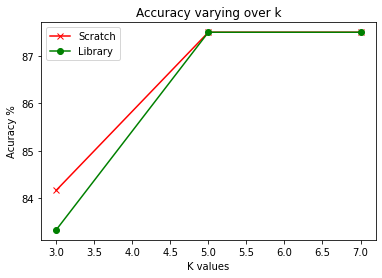

For  75.0 % split
 
For K= 3
Scracth:  92.0 %
Library:  92.0 %
For K= 5
Scracth:  92.0 %
Library:  92.0 %
For K= 7
Scracth:  92.0 %
Library:  92.0 %




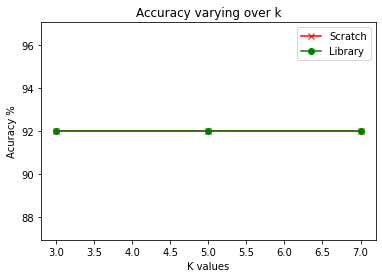

For  80.0 % split
 
For K= 3
Scracth:  87.5 %
Library:  88.75 %
For K= 5
Scracth:  88.75 %
Library:  88.75 %
For K= 7
Scracth:  86.25 %
Library:  86.25 %




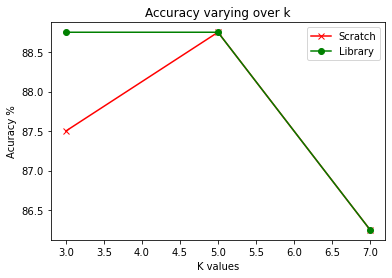

In [473]:
split=[0.70,0.75,0.80]          


for s in split:
    
    # Splitting data according to s %
    train,test=split_dataset(df,s)
    
    X_train = train.iloc[:, :-1] # Features of train
    y_train = train.iloc[:, -1]  # Target of train
    X_test = test.iloc[:, :-1]   # Features of test
    y_test = test.iloc[:, -1]    # Target of test
    
    # Scalling data 
    sc = StandardScaler()
    X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
    X_test[X_test.columns] = sc.fit_transform(X_test[X_test.columns])
    
    # Values of K for checking
    K_vals=[3,5,7]
    
    # Prediction by our algorithm
    pred_scratch=[]
    
    for k in K_vals:
        pred=KNN(X_train,X_test,y_train,k)
        pred_scratch.append(accuracy(list(y_test),pred))
    
    # Prediction by sklearn library
    pred_lib=[]
    
    for k in K_vals:
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        pred = classifier.predict(X_test)
        pred_lib.append(accuracy_score(y_test,pred)*100)
    
    # Printing and Visualising the result 
    print("For ",(s*100),"% split\n ")
    for i in range(len(K_vals)):
        print("For K=",K_vals[i])
        print("Scracth: ",pred_scratch[i],'%')
        print("Library: ",pred_lib[i],'%')
    print('\n')
    plt.plot(K_vals,pred_scratch,color='r',label='Scratch',marker='x')
    plt.plot(K_vals,pred_lib,color='g',label='Library',marker='o')
    
    plt.xlabel("K values")
    plt.ylabel("Acuracy %")
    plt.title("Accuracy varying over k")
    
    plt.legend()
    plt.show()
    
        

## Conclusion

Although you may see that in most splitting the accuracy is same but still there are some cases where it is not same(it depends on how the data is splitted randomly) 
In some cases it's more while in some it's less ( But the difference is small)